# COGS 108 - Final Project 

# Overview

For this project, I intended to look at the number of parks in a given San Diego zip code and figure out whether there is a correlation between parks in a given zip code and number of crimes committed. This is done with the purpose of trying to answer the question about whether more availability to parks reduces crimes being committed, or whether parks help bring about criminal activity. My results showed that there is a positive correlation between the number of parks in a given San Diego zip code and the number of crimes committed in that same zip code. These results suggest that more availability to parks can possibly bring about more crime  in a neighborhood grouped by zip code. 

# Name & GitHub

- Name: Esmeralda Mejia Trejo
- GitHub Username: emejiatr


# Research Question

Does having more parks in a San Diego neighborhood have a negative correlation with crimes being committed when looking at zip code specific neighborhoods?

## Background and Prior Work

According to the city of San Diego, "23% of San Diego residents currently live further than 10-minute walk to a park or green space."(1) This means that there are not enough parks in San Diego for its residents to go to, thus it is discouraging for the event of going outside to be active and to engage in safe acts. Since 2016, the City of San Diego has launched a program called "play all day" which serves the purpose of utilizing parks and fields belonging to school campuses for recreational use outside of school hours. This is the right step to creating more space for kids to play. The goal is to create 45 joint-use park sites.  

An example of data collection that has been done and continues to do so is from the Parks Build Community Project by North Carolina State University and John Hopkins University. From the beginning of Decemeber 2018, residents were surveyed about "the renovation’s impact on park access and safety, and how the project has encouraged local children to play"(2). This goes hand in hand with what San Diego can accomplish too in order to find out more about the impact of parks and how the implementation of them can have a positive impact to communities. The impact that it can have includes the reduction of crimes.

Based on a literature review conducted on the impact of parks and green space and violent crimes from cities around the US, it was found that the presence of parks decreased violent crimes. The variables that helped researches come to this conclusion included "social interaction and recreation, community perception, biophilic stress reduction, climate modulation, and spaces expressing territorial definition"(3) I believe that this can apply to most cases including the case of San Diego's park space which can bring about positivty and less crimes. 

References (include links):


- 1)"The Play All Day Parks Program.” The City of San Diego, www.sandiego.gov/planning/programs/parkplanning/playallday.

- 2)“Measuring the Impact of Parks Build Community: Feature: Parks and Recreation Magazine: NRPA.” National Recreation and Park Association (NRPA), www.nrpa.org/parks-recreation-magazine/2019/may/measuring-the-impact-of-parks-build-community/.

- 3)"The Impact of Green Space on Violent Crime in Urban Environments: An Evidence Synthesis" https://www.mdpi.com/1660-4601/16/24/5119/pdf




# Hypothesis


When analyzing zip codes from San Diego, if there is a greater number of parks in a given zip code, then there will be less crimes recorded for that location. I believe that this negative correlation will show to be true due to the fact that parks serve as a location for pastime where people can distract themselves, play and relax, which will deviate the feeling of boredom and possible criminal tendencies. 

# Dataset(s)

I used the yelp park information(yelp_SD_parks.csv) in order to get the names of the parks in San Diego and be able to extract their address as well. I wanted to take into account the address of these parks in order to cross reference it with the address of crimes. I ended up specifically using the zip code from these addresses in order to group the number of parks per zip code area in San Diego. 
- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 833 rows × 10 columns


I used the San Diego crime data by obtaining the pd_calls_for_service_2020_datasd.csv dataframe in order to cross reference the address of the parks. I came across the problem that this dataset did not include the zip code, so I only used it in my setup and in my datacleaning because I soon realized that if I extracted the street name instead, I would miss a lot of varibales due to the variability in length and number of words per street name. 
- Dataset Name: pd_calls_for_service_2020_datasd.csv 
- Link to the dataset: )https://data.sandiego.gov/datasets/police-calls-for-service/
- Number of observations: 539456 rows × 14 columns


I used the public crime data from SANDAG which has the crime information of the last 180 days, which gives me enough data to work with. Compared to the poilce_calls dataframe, this one did in fact have a zip code and fortunately it was in its own column so I only had to really focus on cleaning the data from the yelp information. I used this dataframe in my final analysis since i compared parks and crimes based on common zip code. 
- Dataset Name: ARJISPublicCrime120920.txt
- Link to the dataset:https://www.sandag.org/index.asp?classid=14&subclassid=21&projectid=446&fuseaction=projects.detail
- Number of observations: 61454 rows × 7 columns



# Setup

In [1]:
## imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm


In [2]:
#read data
df_crimes = pd.read_csv('pd_calls_for_service_2020_datasd.csv')
df_crimes

,incident_num,date_time,day_of_week,address_number_primary,address_dir_primary,address_road_primary,address_sfx_primary,address_dir_intersecting,address_road_intersecting,address_sfx_intersecting,call_type,disposition,beat,priority
0,E20010000001,2020-01-01 00:00:09,4,400,NaN,06TH,AVE,NaN,NaN,NaN,11-8,A,523,0
1,E20010000002,2020-01-01 00:00:20,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
2,E20010000003,2020-01-01 00:00:21,4,800,NaN,SAWTELLE,AVE,NaN,NaN,NaN,AU1,W,434,1
3,E20010000004,2020-01-01 00:00:32,4,5000,NaN,UNIVERSITY,AVE,NaN,NaN,NaN,FD,K,826,2
4,E20010000005,2020-01-01 00:00:42,4,5200,NaN,CLAIREMONT MESA,BLV,NaN,NaN,NaN,415V,K,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539451,E20120019586,2020-12-12 23:43:59,7,15000,NaN,AVENIDA VENUSTO,NaN,NaN,NaN,NaN,CW,CAN,234,1
539452,E20120019588,2020-12-12 23:44:10,7,4600,NaN,OREGON,ST,NaN,NaN,NaN,PARTY,K,813,3
539453,E20120019590,2020-12-12 23:46:10,7,9500,NaN,CHESAPEAKE,DR,NaN,NaN,NaN,911,K,313,1
539454,E20120019594,2020-12-12 23:49:02,7,4600,NaN,OREGON,ST,NaN,NaN,NaN,415N,DUP,813,3


In [3]:
#park locations
df_location = pd.read_csv('yelp_SD_parks.csv')
df_location

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


# Data Cleaning

In [4]:
#drop columns from yelp we don't need 
df_location = df_location.drop(columns = ['phone', 'id', 'url', 'review_count', 'longitude', 'latitude','is_closed' ])

#function to help strip address to just street and zipcode
def street_name(address):
    address = address.upper()
    address = address.replace(', CA', ',')
    address = address.replace('SAN DIEGO', '')
    address = address.replace('CARLSBAD', '')
    address = address.replace('CHULA VISTA', '')
    address = address.replace('CORONADO', '')
    address = address.replace('DEL MAR', '')
    address = address.replace('ENCINITAS', '') 
    address = address.replace('ESCONDIDO', '') 
    address = address.replace('SAN DIEGO', '')
    address = address.replace('IMPERIAL BEACH', '') 
    address = address.replace('LA JOLLA', '')
    address = address.replace('SAN MARCOS', '')
    address = address.replace('SANTEE', '')
    address = address.replace('FALLBROOK', '')
    address = address.replace('RAMONA', '')
    address = address.replace('BAJA CALIFORNIA', '')
    address = address.replace('MEXICO', '')
    
    return address

#apply function to transform address column
df_location['address'] = df_location['address'].apply(street_name)
df_location
#split address to isolate zip code
new = df_location['address'].str.split(", ", n = 1, expand = True) 

#create new dataframe with split street address and zip
df_location['street_name'] = new[0]
df_location['zip_code'] = new[1]

#replace address with street info only
df_location.drop(columns =["address"], inplace = True) 

#remove leading street number
df_location['street_name'] = df_location['street_name'].str.replace('\d+\s', '') 



In [5]:
df_location

,name,rating,street_name,zip_code
0,Balboa Park,5.0,EL PRADO,92101
1,Civita Park,4.5,CIVITA BLVD,92108
2,Waterfront Park,4.5,PACIFIC HWY,92101
3,Trolley Barn Park,4.5,ADAMS AVE AND FLORIDA ST,92116
4,Bay View Park,5.0,1ST ST,92118
...,...,...,...,...
828,Del Cerro - San Diego,4.5,,92120
829,San Diego Metropolitan Transit System,2.5,IMPERIAL AVE STE,92101
830,Petco Park,4.0,PARK BLVD,92101
831,Ann D. L'Heureux Memorial Dog Park,3.0,VILLAGE DR,92008


In [6]:
#make the street name into one variable
df_crimes['address_road_name'] = df_crimes['address_dir_primary'].fillna('') +' '+ df_crimes['address_road_primary'].fillna('') + ' ' + df_crimes['address_sfx_primary'].fillna('')

#replace street name variables with one single one
df_crimes.drop(columns =["address_dir_primary", "address_road_primary", "address_sfx_primary"], inplace = True) 

#create new dataframe with count of crimes per street name
df_total_crimes = df_crimes['address_road_name'].value_counts().rename_axis('street_name').reset_index(name = 'crime_count')



df_total_crimes

,street_name,crime_count
0,IMPERIAL AVE,9453
1,EL CAJON BLV,9172
2,UNIVERSITY AVE,8611
3,05TH AVE,6604
4,BROADWAY,4935
...,...,...
12098,SB 5 B4 GARNET,1
12099,IDAHO AVE,1
12100,CAMINITO MONROVIA,1
12101,S LAUSANNE DR,1


Describe your data cleaning steps here.

In [7]:
#merge park data with crime data
crime_by_park_df = pd.merge(df_total_crimes, df_location, on = 'street_name', how = 'right')
crime_by_park_df = crime_by_park_df[['name', 'street_name', 'crime_count']]
crime_df = crime_by_park_df.sort_values(['crime_count'], ascending=[False])
crime_df

,name,street_name,crime_count
0,Hall of Justice,W BROADWAY,469.0
1,United States District Court Jury Assembly Room,W BROADWAY,469.0
2,San Diego Children's Discovery Museum,N BROADWAY,4.0
3,Balboa Park,EL PRADO,NaN
4,San Diego Natural History Museum,EL PRADO,NaN
...,...,...,...
828,Mission San Diego Trolley Station,WARD RD & RANCHO MISSION RD,NaN
829,Rio Vista Trolley Station,STATION VILLAGE WAY,NaN
830,San Diego Metropolitan Transit System,IMPERIAL AVE STE,NaN
831,Ann D. L'Heureux Memorial Dog Park,VILLAGE DR,NaN


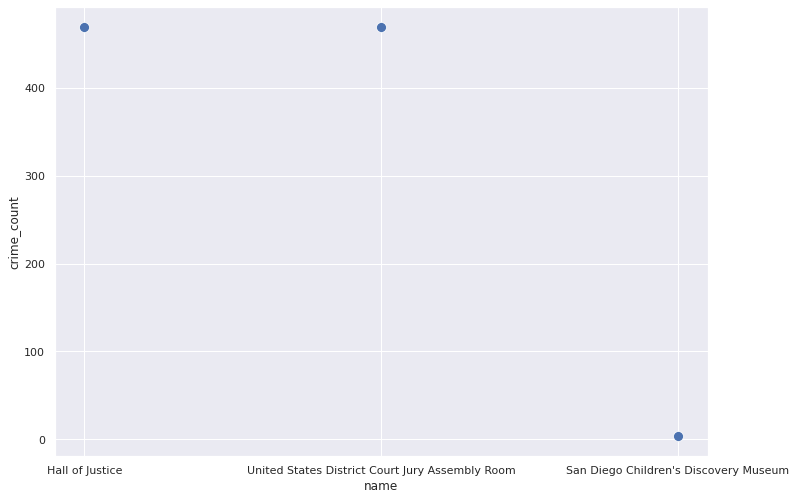

In [8]:
#make scatterplot of crimes per street
sns.set(rc={'figure.figsize':(11.7,8.27)})
q = crime_df.groupby(crime_df['name'])
sns.scatterplot(x = crime_df['name'], y = crime_df['crime_count'], s = 100)


The data above is not very useful for analyzing so I will use a new dataset of crimes with zipcode included. This way I can compare the number of crimes per zip code and the number of parks per zip code. 

In [9]:
#convert txt to csv for 2020 San Diego crimes with zip code
new_crime_df = pd.read_csv("ARJISPublicCrime120920.txt")
new_crime_df.to_csv("ARJISPublicCrime120920.csv", index = None)
#new_crime_df.dropna(inplace=True)
#new_crime_df['ZipCode'].unique()
#new_crime_df

In [10]:
#create new dataframe with just the counts of crimes per zipcode
df_crimes_zip = new_crime_df['ZipCode'].value_counts().rename_axis('zip_code').reset_index(name = 'crime_count')

#remove zip codes that are outside of SD
df_crimes_zip = df_crimes_zip[df_crimes_zip['zip_code'] > 90000]
df_crimes_zip = df_crimes_zip[df_crimes_zip['zip_code'] < 93000]

#remove zip codes with no crimes
#df_crimes_zip = df_crimes_zip[df_crimes_zip['crime_count'] > 0]
#df_crimes_zip['zip_code'].unique()

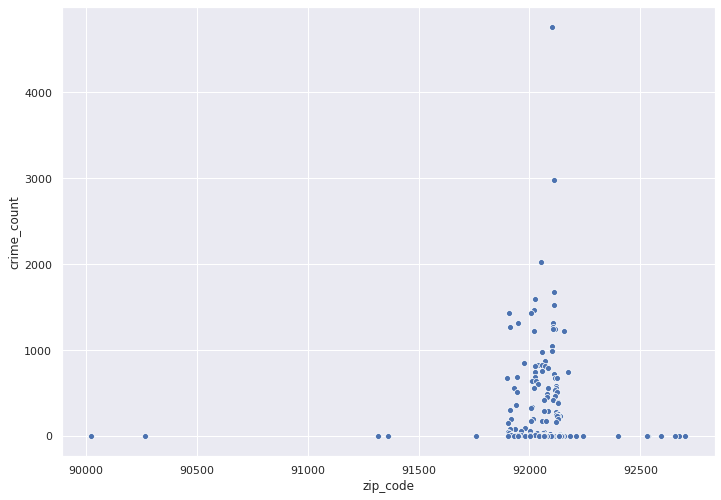

In [11]:
#scatterplot of zip code and crime count
sns.scatterplot(x = df_crimes_zip['zip_code'], y = df_crimes_zip['crime_count'])

In [12]:
#new data frame with name and zip code of park 
df_parks_zip = df_location[['name', 'zip_code']]


#new dataframe with parks per zip code
df_parks_zip_counts = df_parks_zip['zip_code'].value_counts().rename_axis('zip_code').reset_index(name = 'park_count')


#remove empty zip code
df_parks_zip_counts.replace(' ', np.nan, inplace=True)
df_parks_zip_counts.dropna(inplace=True)

#convert from object to float to merge with crime df
df_parks_zip_counts['zip_code'] = df_parks_zip_counts.zip_code.astype(float)

#checks the values of zip code column to make sure theyre floats
#df_parks_zip_counts['zip_code'].unique()

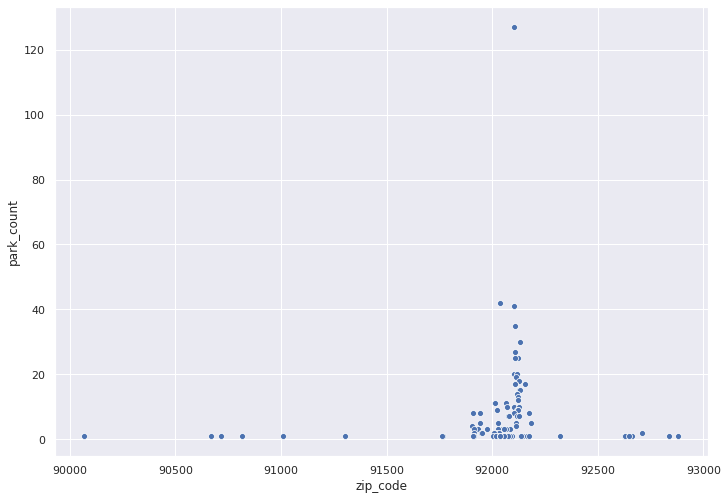

In [13]:
sns.scatterplot(x = df_parks_zip_counts['zip_code'], y = df_parks_zip_counts['park_count'])

In [14]:
#merge based on common zip code to compare number of parks to number of crimes reported
crime_park_zip_df = pd.merge(df_parks_zip_counts, df_crimes_zip, on = 'zip_code', how = 'inner')

#sort crimes by descending order
crime_park_zip_df = crime_park_zip_df.sort_values(['crime_count'], ascending=[False])
crime_park_zip_df

,zip_code,park_count,crime_count
0,92101.0,127,4760
3,92109.0,35,2985
49,92054.0,3,2021
5,92110.0,27,1680
40,92025.0,5,1598
...,...,...,...
60,91916.0,2,10
70,92023.0,1,6
39,92182.0,5,5
73,92145.0,1,3


# Data Analysis & Results

I wanted to see a broader spectrum of how the three variables were interrelated so I created a scatter matrix. 


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:3

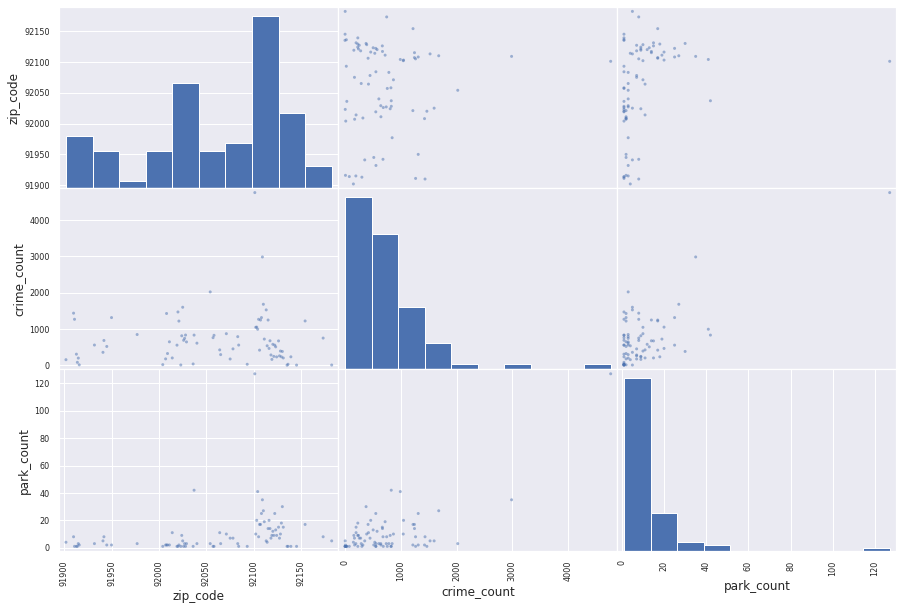

In [15]:
pd.plotting.scatter_matrix(crime_park_zip_df[['zip_code', 'crime_count', 'park_count']], 
                           figsize=(15, 10));

I will take out the zip code out of the picture since we alreadt know the number of parks in each and the number of crimes
in each. I will now compare the  number of parks to the number of crimes per zip code. 

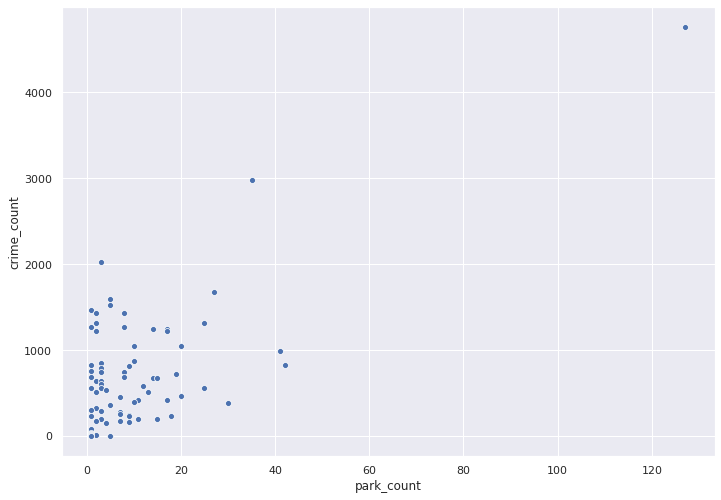

In [16]:
#isolate zip code for a second and see the relationship between parks and crime count
ax = sns.scatterplot(x = crime_park_zip_df['park_count'], y = crime_park_zip_df['crime_count'])

I will use a regression model in order to see if there's statistical significance or if there's a correlation between
number of parks and number of crimes

In [17]:
#regression model
outcome, predictors = patsy.dmatrices('crime_count ~ park_count', crime_park_zip_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_count   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     64.03
Date:                Wed, 16 Dec 2020   Prob (F-statistic):           1.01e-11
Time:                        02:21:57   Log-Likelihood:                -606.58
No. Observations:                  79   AIC:                             1217.
Df Residuals:                      77   BIC:                             1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    416.8198     70.302      5.929      0.0

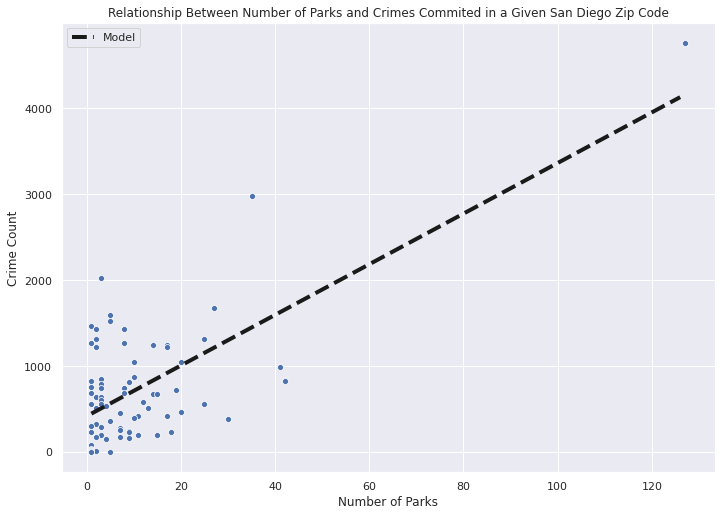

In [18]:
#plot original data
sns.scatterplot(x='park_count', y='crime_count', data=crime_park_zip_df)

#generate model fit line
xs = np.arange(crime_park_zip_df['park_count'].min(), crime_park_zip_df['park_count'].max())
ys = 29.4815 * xs + 416.8198
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

#label new graph
plt.xlabel('Number of Parks')
plt.ylabel('Crime Count')
plt.title('Relationship Between Number of Parks and Crimes Commited in a Given San Diego Zip Code')
plt.legend();

# Ethics & Privacy

The data from the criminal records of both the pd calls for service and the public crime data contained a lot of specific dettails about the crimes that were committed such as incident number, day, time, and place. In order to preserve the anonymity of these records, which people could easily look up and expose people for their crimes, it was important for me to remove all those columns and simply leave the columns containing the street address or the zip code. Additionally, my last graph anonymized the information even more by removing the zip code and just having raw numbers to work with. 

It would be unethical to apply this same method to a larger population or to a different factor such as cities around the country, instead of zip code since different cities are run more broadly and may have varying parks and rec budgets that would just add to the cofounding variables. It is important to not remove relevant data in order to make it "neater." The only instance I had to do so was when the zip code variation included zip codes outside of San Diego such as Mexican zip codes.

# Conclusion & Discussion

Based on the analysis before, there seems to be a positive correlation between the number of parks in a zip code and the number of crimes. My hypothesis proved to be wrong since I had predicted that having more parks would have a negative correlation with crimes being committed. 

When begninning this project, my initial goal was to compare street names where crimes occured to street names of parks. I came across a lot of difficulty when it came to cleaning the data for yelp_SD_data.csv since the addresses were fully written on one column; this meant that I had to do a lot of data cleaning to isolate the street name. After doing the best I could, I compared the steet names of crimes to those of park addresses, however, I only came across 3 data points. This was not going to tell me anything so I decided to look for a dataframe of San Diego crimes that separated the address and had zip code separated. After using ARJISPublicCrime120920.csv, I utilized value counts for the zip codes of the parks and the crimes and then did an inner merge in order to see if there was a correlation. 
I believe that this data is not to be taken as an indication for causation. This data merely shows a negative correlation between number of parks and crimes recorded. 
If I were to continue working on this project for longer time, I would take into consideration population density per zip code area in order to account for high number of parks or high number of crimes. 